In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [210]:
chunksize = 20000  # adjust based on your system capacity
chunks = pd.read_csv("diabetic_data.csv", chunksize=chunksize)

# Combine chunks into one DataFrame
df = pd.concat(chunks)


In [211]:
df = pd.read_csv("diabetic_data.csv", low_memory=False)


In [212]:
df_sample = pd.read_csv("diabetic_data.csv", nrows=10000)
print(df_sample.head())


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [213]:
df = pd.read_csv("diabetic_data.csv", on_bad_lines='skip')


In [214]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [215]:
print(df.shape)



(101766, 50)


In [216]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [217]:
print(df.describe(include='all'))


        encounter_id   patient_nbr       race  gender      age  weight  \
count   1.017660e+05  1.017660e+05     101766  101766   101766  101766   
unique           NaN           NaN          6       3       10      10   
top              NaN           NaN  Caucasian  Female  [70-80)       ?   
freq             NaN           NaN      76099   54708    26068   98569   
mean    1.652016e+08  5.433040e+07        NaN     NaN      NaN     NaN   
std     1.026403e+08  3.869636e+07        NaN     NaN      NaN     NaN   
min     1.252200e+04  1.350000e+02        NaN     NaN      NaN     NaN   
25%     8.496119e+07  2.341322e+07        NaN     NaN      NaN     NaN   
50%     1.523890e+08  4.550514e+07        NaN     NaN      NaN     NaN   
75%     2.302709e+08  8.754595e+07        NaN     NaN      NaN     NaN   
max     4.438672e+08  1.895026e+08        NaN     NaN      NaN     NaN   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count       101766.000000          

In [218]:
print(df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [219]:
# Replace '?' with NaN for uniform handling
df.replace('?', np.nan, inplace=True)




In [220]:
# Drop columns with too many missing values or non-relevant info
df.drop(['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'], axis=1, inplace=True)



In [221]:
# Drop rows with missing values in important columns (or use imputer)
df.dropna(inplace=True)


In [222]:
df.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

Target variable analysis

<Axes: title={'center': 'Target Variable Distribution'}, xlabel='readmitted'>

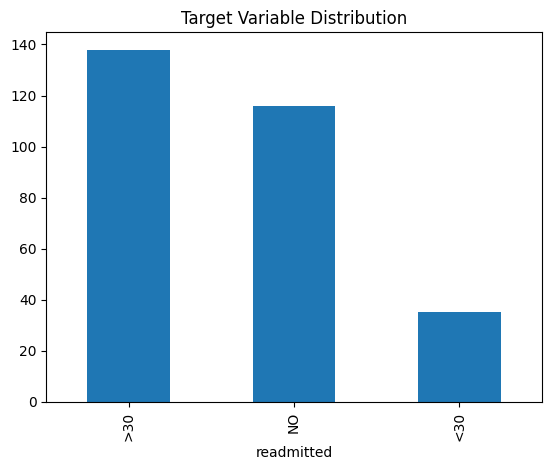

In [223]:
df['readmitted'].value_counts().plot(kind='bar', title='Target Variable Distribution')


univariant analaysia

<Axes: title={'center': 'Gender Distribution'}, xlabel='gender'>

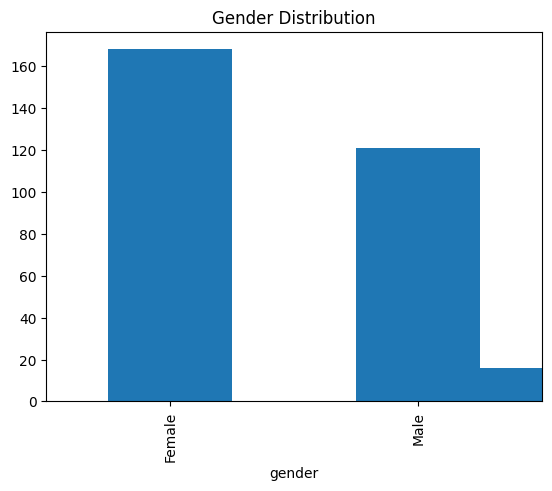

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for numerical
df['time_in_hospital'].hist(bins=20)
plt.title('Time in Hospital Distribution')

# Example for categorical
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')


multivariant analysis

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '[80-90)'),
  Text(1, 0, '[70-80)'),
  Text(2, 0, '[50-60)'),
  Text(3, 0, '[30-40)'),
  Text(4, 0, '[40-50)'),
  Text(5, 0, '[60-70)'),
  Text(6, 0, '[10-20)'),
  Text(7, 0, '[20-30)')])

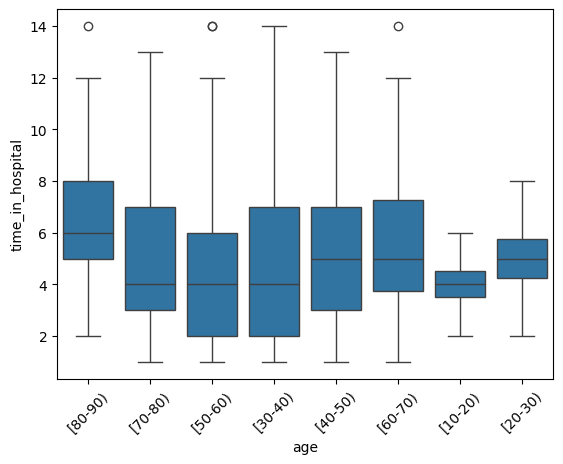

In [225]:
# Relationship between age and time_in_hospital
sns.boxplot(x='age', y='time_in_hospital', data=df)
plt.xticks(rotation=45)


correlation matics

Text(0.5, 1.0, 'Correlation Heatmap')

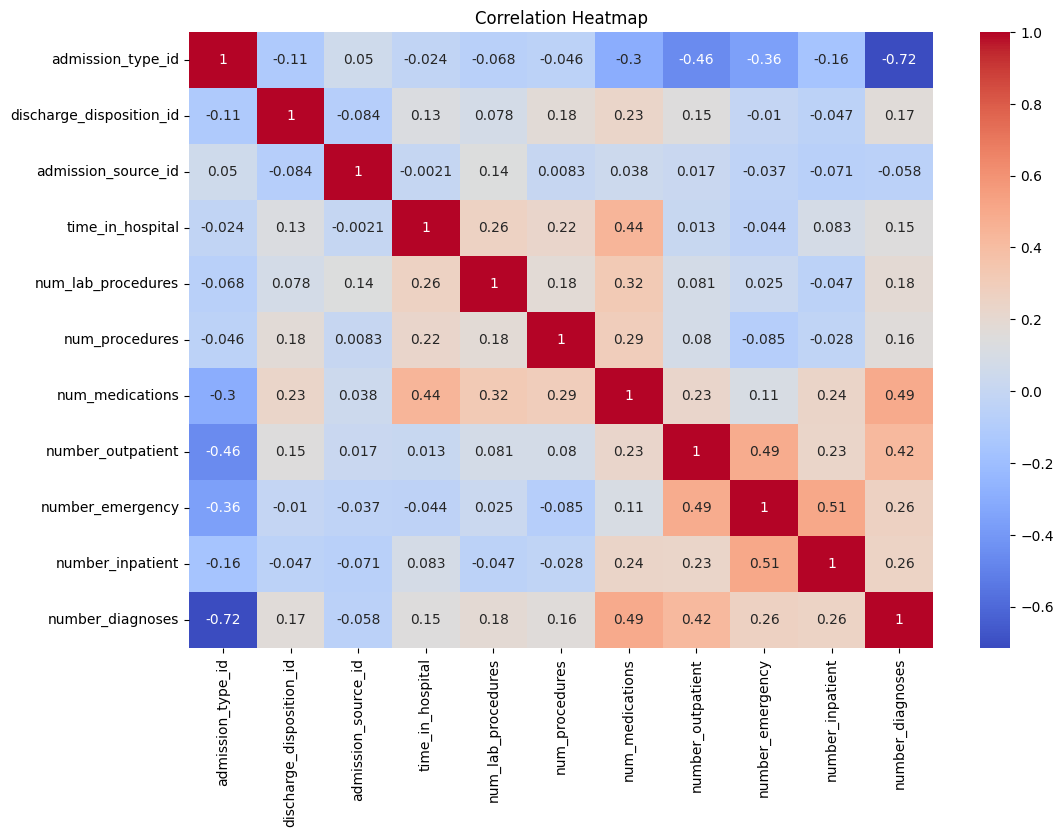

In [226]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')


checking imbalance

In [227]:
df['readmitted'].value_counts(normalize=True)


readmitted
>30    0.477509
NO     0.401384
<30    0.121107
Name: proportion, dtype: float64

In [228]:
# Target variable transformation
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [229]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
162,Caucasian,Male,[80-90),6,3,7,5,47,1,6,...,No,No,No,No,No,No,No,No,No,1
460,AfricanAmerican,Female,[70-80),6,1,7,10,72,1,19,...,No,Up,No,No,No,No,No,Ch,Yes,0
593,Caucasian,Female,[50-60),6,1,7,2,61,0,5,...,No,Steady,No,No,No,No,No,No,Yes,0
696,Other,Male,[70-80),6,6,7,11,71,1,20,...,No,No,No,No,No,No,No,No,Yes,0
771,Caucasian,Female,[30-40),6,1,2,14,43,0,11,...,No,No,No,No,No,No,No,No,No,0


In [230]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 162 to 101088
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      289 non-null    int64
 1   gender                    289 non-null    int64
 2   age                       289 non-null    int64
 3   admission_type_id         289 non-null    int64
 4   discharge_disposition_id  289 non-null    int64
 5   admission_source_id       289 non-null    int64
 6   time_in_hospital          289 non-null    int64
 7   num_lab_procedures        289 non-null    int64
 8   num_procedures            289 non-null    int64
 9   num_medications           289 non-null    int64
 10  number_outpatient         289 non-null    int64
 11  number_emergency          289 non-null    int64
 12  number_inpatient          289 non-null    int64
 13  diag_1                    289 non-null    int64
 14  diag_2                    289 non-null    

In [232]:
scaler = StandardScaler()
features = df.drop('readmitted', axis=1)
scaled_features = scaler.fit_transform(features)
X = pd.DataFrame(scaled_features, columns=features.columns)
y = df['readmitted']

In [233]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split after resampling
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)



In [234]:
from sklearn.linear_model import LogisticRegression

In [235]:
from sklearn.naive_bayes import GaussianNB

In [236]:
from sklearn.svm import SVC

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
from xgboost import XGBClassifier

In [246]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [248]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [249]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [256]:
accuracy_score(y_test, y_pred)

0.9313725490196079

In [257]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [259]:
f1_score(y_test, y_pred)

0.9306930693069307

In [260]:
precision_score(y_test, y_pred)

0.9494949494949495

In [261]:
recall_score(y_test, y_pred)

0.912621359223301

In [250]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9313725490196079

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       101
           1       0.95      0.91      0.93       103

    accuracy                           0.93       204
   macro avg       0.93      0.93      0.93       204
weighted avg       0.93      0.93      0.93       204


Confusion Matrix:
 [[96  5]
 [ 9 94]]


In [245]:

# model = RandomForestClassifier()
# model.fit(X_train, y_train)


In [251]:
# y_pred = model.predict(X_test)

# # Evaluation metrics
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [252]:
from sklearn.metrics import roc_auc_score

In [253]:
roc_auc_score(y_test, y_pred)

np.float64(0.9315582043641257)

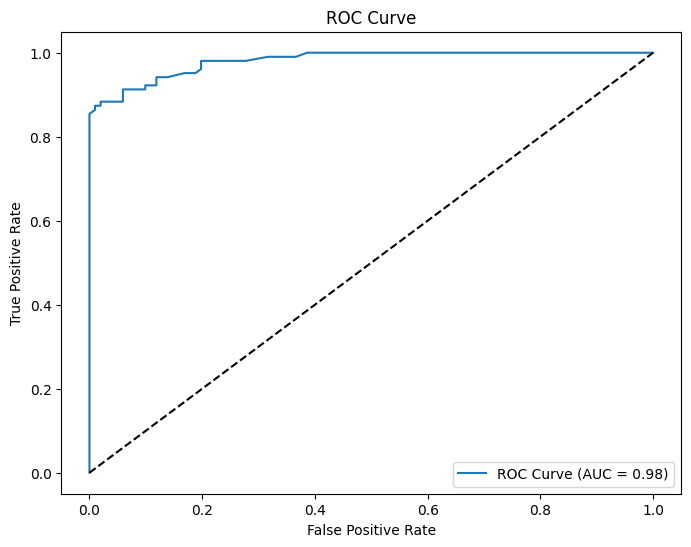

In [254]:
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


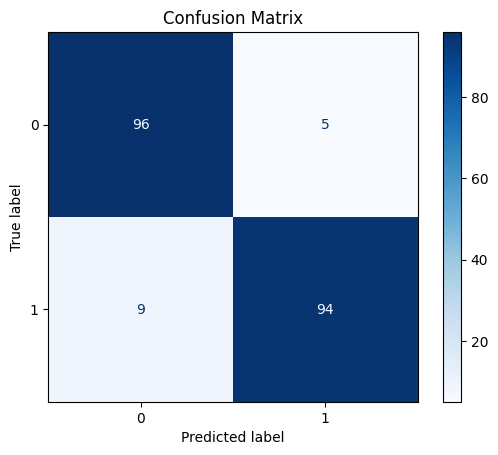

In [255]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
